In [7]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import sys 
sys.path.append('../')
import src.model.feature_cleaning as feature_cleaning


In [8]:
df, fieldofdegree_df, SOCP_labels, schl_labels, major_majors, NAICSP_labels_df, MAJ_NAICSP_labels_df = feature_cleaning.load_dfs()

youngemp_df = feature_cleaning.clean_that_target(df, SOCP_labels)
youngemp_df = feature_cleaning.single_occ_target(youngemp_df)
freewill_df = feature_cleaning.create_freewill_df(youngemp_df, fieldofdegree_df, schl_labels, major_majors)

../src/model/feature_cleaning.py:81: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SOCPdf = df.dropna(axis='index', subset=['SOCP'])[df.SOCP != '999920']


Number of employed people: 218454
Percent employed people: 0.5785711448056677
Number of young employed people: 77406
Percent young employed people(out of all PUMS): 0.20500827650135733
Number of emp cats: 23
Number of degree fields present (max 173): 173
before dummies:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77406 entries, 0 to 77405
Columns: 295 entries, RT to SCHL_ord
dtypes: float64(82), int64(201), object(12)
memory usage: 227.2 MB
None


In [9]:
freewill_df.head()

RT       SERIALNO  DIVISION  SPORDER  PUMA  REGION  ST   ADJINC  PWGTP  AGEP  CIT   CITWP  COW  DDRS  DEAR  DEYE  DOUT  DPHY  DRAT  DRATX  DREM  ENG  FER  GCL  GCM  GCR  HINS1  HINS2  HINS3  HINS4  HINS5  HINS6  HINS7   INTP  JWMNP  JWRIP  JWTR  LANX  MAR  MARHD  MARHM  MARHT  MARHW  MARHYP  MIG  MIL  MLPA  MLPB  MLPCD  MLPE  MLPFG  MLPH  MLPI  MLPJ  MLPK  NWAB  NWAV  NWLA  NWLK  NWRE  OIP  PAP  RELP  RETP  SCH  SCHG SCHL  SEMP  SEX  SSIP  SSP      WAGP  WKHP  WKL  WKW  WRK    YOEP  ANC  ANC1P  ANC2P  DECADE  DIS  DRIVESP  ESP  ESR FOD1P FOD2P  HICOV  HISP    INDP   JWAP   JWDP    LANP  MIGPUMA  MIGSP  MSP  NAICSP  NATIVITY  NOP   OC    OCCP  PAOC     PERNP     PINCP  POBP  POVPIP  POWPUMA  POWSP  PRIVCOV  PUBCOV  QTRBIR  RAC1P  RAC2P  RAC3P  RACAIAN  RACASN  RACBLK  RACNH  RACNUM  RACPI  RACSOR  RACWHT   RC  SCIENGP  SCIENGRLP  SFN  SFR    SOCP  VPS  WAOB  FAGEP  FANCP  FCITP  FCITWP  FCOWP  FDDRSP  FDEARP  FDEYEP  FDISP  FDOUTP  FDPHYP  FDRATP  FDRATXP  FDREMP  FENGP  FESRP  \
0  P  2017000000017         9        1   110       4   6  1011189     75    34    5     NaN  1.0   2.0     2     2   2.0   2.0   NaN    NaN   2.0  1.0  NaN  2.0  NaN  NaN      1      2      2      2      2      2      2  500.0   60.0    1.0   1.0   1.0    1    2.0    2.0    1.0    2.0  2011.0  3.0  4.0   NaN   NaN    NaN   NaN    NaN   NaN   NaN   NaN   NaN   3.0   5.0   3.0   3.0   3.0  0.0  0.0     0   0.0  1.0   NaN   21   0.0    1   0.0  0.0  130000.0  55.0  1.0  1.0  1.0  2013.0    1    706    999     8.0    2      1.0  NaN  1.0  2499  9999      1     1  7380.0  112.0   61.0  1970.0   8500.0    6.0  1.0    5415         2  NaN  0.0  1460.0   NaN  130000.0  130500.0   207   501.0   8500.0    6.0        1       2       1      6     43      5        0       1       0      0       1      0       0       0  0.0      1.0        2.0  NaN  NaN  172141  NaN     4      0      0      0       0      0       0       0       0      0       0       0       0        0       0      0      0   
1  P  2017000000017         9        2   110       4   6  1011189     71    33    5     NaN  1.0   2.0     2     2   2.0   2.0   NaN    NaN   2.0  2.0  2.0  2.0  NaN  NaN      1      2      2      2      2      2      2    0.0    NaN    NaN   NaN   1.0    1    2.0    2.0    1.0    2.0  2011.0  3.0  4.0   NaN   NaN    NaN   NaN    NaN   NaN   NaN   NaN   NaN   2.0   5.0   2.0   2.0   3.0  0.0  0.0     1   0.0  1.0   NaN   22   0.0    2   0.0  0.0       0.0   NaN  2.0  NaN  2.0  2013.0    1    706    999     8.0    2      NaN  NaN  6.0  1104  9999      1     1  2290.0    NaN    NaN  1970.0   8500.0    6.0  1.0    325M         2  NaN  0.0   735.0   1.0       0.0       0.0   207   501.0      NaN    NaN        1       2       3      6     43      5        0       1       0      0       1      0       0       0  0.0      1.0        2.0  NaN  NaN  131161  NaN     4      0      0      0       0      0       0       0       0      0       0       0       0        0       0      0      0   
2  P  2017000000036         9        1  6710       4   6  1011189     74    35    4  1991.0  5.0   2.0     2     2   2.0   2.0   NaN    NaN   2.0  2.0  NaN  2.0  NaN  NaN      1      2      2      2      2      2      2    0.0   30.0    1.0   1.0   1.0    1    2.0    2.0    1.0    2.0  2013.0  1.0  4.0   NaN   NaN    NaN   NaN    NaN   NaN   NaN   NaN   NaN   3.0   5.0   3.0   3.0   3.0  0.0  0.0     0   0.0  1.0   NaN   21   0.0    1   0.0  0.0   58000.0  65.0  1.0  1.0  1.0  1982.0    1    785    999     5.0    2      1.0  NaN  1.0  6212  9999      1     1  9490.0   64.0   19.0  1960.0      NaN    NaN  1.0    92M1         2  NaN  0.0   540.0   NaN   58000.0   58000.0   226   501.0   6700.0    6.0        1       2       3      6     57      9        0       1       0      0       1      0       0       0  0.0      2.0        2.0  NaN  NaN  131030  NaN     4      0      0      0       0      0       0       0       0      0       0       0       0        0       0      0      0   
3  P  201700000003

In [17]:
len(freewill_df.PUMA.value_counts().unique())

184

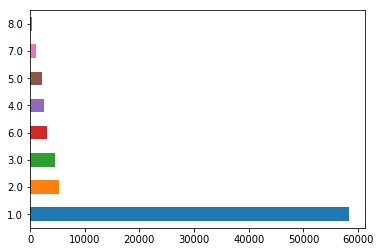

In [19]:
freewill_df.COW.value_counts().plot(kind='barh')

In [21]:
COW_df = {
1:'Employee(for-profit)',
2:'Employee(non-profit)',
3:'Local gov employee',
4:'State govemployee',
5:'Federal gov employee',
6:'Self-employed(not inc)',
7:'Self-employed(inc)',
8:'Family business, unpaid'}

#create column for label names
freewill_df['COW_labels'] = freewill_df.COW.map(COW_df)
freewill_df

0           Employee(for-profit)
1           Employee(for-profit)
2           Federal gov employee
3           Employee(for-profit)
4           Federal gov employee
5             Local gov employee
6           Employee(for-profit)
7           Employee(for-profit)
8           Employee(for-profit)
9           Employee(for-profit)
10          Employee(for-profit)
11          Employee(for-profit)
12          Employee(for-profit)
13          Employee(for-profit)
14          Employee(for-profit)
15            Self-employed(inc)
16            Self-employed(inc)
17          Employee(for-profit)
18          Employee(for-profit)
19        Self-employed(not inc)
20          Employee(for-profit)
21          Employee(non-profit)
22            Local gov employee
23          Employee(non-profit)
24          Employee(for-profit)
25          Employee(for-profit)
26          Employee(for-profit)
27          Employee(for-profit)
28          Employee(for-profit)
29          Employee(for-profit)
30        

In [28]:
freewill_df.COW.isna().sum()

0

In [29]:
freewill_df.ENG.isna().sum()

43835

In [30]:
freewill_df.ENG = freewill_df.ENG.fillna(9999)
freewill_df.ENG.isna().sum()

0

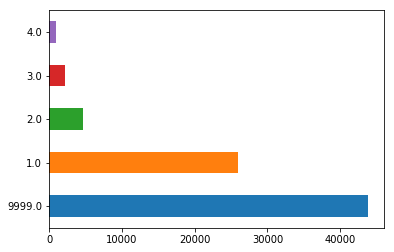

In [32]:
freewill_df.ENG.value_counts().plot(kind='barh')

In [33]:
ENG_df = {
9999:'Native',
1:'Very well',
2:'Well',
3:'Not well',
4:'Not at all'}

#create column for label names
freewill_df['ENG_labels'] = freewill_df.ENG.map(ENG_df)
freewill_df

RT       SERIALNO  DIVISION  SPORDER   PUMA  REGION  ST   ADJINC  PWGTP  AGEP  CIT   CITWP  COW  DDRS  DEAR  DEYE  DOUT  DPHY  DRAT  DRATX  DREM     ENG  FER  GCL  GCM  GCR  HINS1  HINS2  HINS3  HINS4  HINS5  HINS6  HINS7     INTP  JWMNP  JWRIP  JWTR  LANX  MAR  MARHD  MARHM  MARHT  MARHW  MARHYP  MIG  MIL  MLPA  MLPB  MLPCD  MLPE  MLPFG  MLPH  MLPI  MLPJ  MLPK  NWAB  NWAV  NWLA  NWLK  NWRE      OIP     PAP  RELP     RETP  SCH  SCHG SCHL      SEMP  SEX     SSIP      SSP      WAGP  WKHP  WKL  WKW  WRK    YOEP  ANC  ANC1P  ANC2P  DECADE  DIS  DRIVESP  ESP  ESR FOD1P FOD2P  HICOV  HISP    INDP   JWAP   JWDP    LANP  MIGPUMA  MIGSP  MSP    NAICSP  NATIVITY  NOP   OC    OCCP  PAOC     PERNP     PINCP  POBP  POVPIP  POWPUMA  POWSP  PRIVCOV  PUBCOV  QTRBIR  RAC1P  RAC2P  RAC3P  RACAIAN  RACASN  RACBLK  RACNH  RACNUM  RACPI  RACSOR  RACWHT   RC  SCIENGP  SCIENGRLP  SFN  SFR    SOCP  VPS  WAOB  FAGEP  FANCP  FCITP  FCITWP  FCOWP  FDDRSP  FDEARP  FDEYEP  FDISP  FDOUTP  FDPHYP  FDRATP  \
0      P  2017000000017         9        1    110       4   6  1011189     75    34    5     NaN  1.0   2.0     2     2   2.0   2.0   NaN    NaN   2.0     1.0  NaN  2.0  NaN  NaN      1      2      2      2      2      2      2    500.0   60.0    1.0   1.0   1.0    1    2.0    2.0    1.0    2.0  2011.0  3.0  4.0   NaN   NaN    NaN   NaN    NaN   NaN   NaN   NaN   NaN   3.0   5.0   3.0   3.0   3.0      0.0     0.0     0      0.0  1.0   NaN   21       0.0    1      0.0      0.0  130000.0  55.0  1.0  1.0  1.0  2013.0    1    706    999     8.0    2      1.0  NaN  1.0  2499  9999      1     1  7380.0  112.0   61.0  1970.0   8500.0    6.0  1.0      5415         2  NaN  0.0  1460.0   NaN  130000.0  130500.0   207   501.0   8500.0    6.0        1       2       1      6     43      5        0       1       0      0       1      0       0       0  0.0      1.0        2.0  NaN  NaN  172141  NaN     4      0      0      0       0      0       0       0       0      0       0       0       0   
1      P  2017000000017         9        2    110       4   6  1011189     71    33    5     NaN  1.0   2.0     2     2   2.0   2.0   NaN    NaN   2.0     2.0  2.0  2.0  NaN  NaN      1      2      2      2      2      2      2      0.0    NaN    NaN   NaN   1.0    1    2.0    2.0    1.0    2.0  2011.0  3.0  4.0   NaN   NaN    NaN   NaN    NaN   NaN   NaN   NaN   NaN   2.0   5.0   2.0   2.0   3.0      0.0     0.0     1      0.0  1.0   NaN   22       0.0    2      0.0      0.0       0.0   NaN  2.0  NaN  2.0  2013.0    1    706    999     8.0    2      NaN  NaN  6.0  1104  9999      1     1  2290.0    NaN    NaN  1970.0   8500.0    6.0  1.0      325M         2  NaN  0.0   735.0   1.0       0.0       0.0   207   501.0      NaN    NaN        1       2       3      6     43      5        0       1       0      0       1      0       0       0  0.0      1.0        2.0  NaN  NaN  131161  NaN     4      0      0      0       0      0       0       0       0      0       0       0       0   
2      P  2017000000036         9        1   6710       4   6  1011189     74    35    4  1991.0  5.0   2.0     2     2   2.0   2.0   NaN    NaN   2.0     2.0  NaN  2.0  NaN  NaN      1      2      2      2      2      2      2      0.0   30.0    1.0   1.0   1.0    1    2.0    2.0    1.0    2.0  2013.0  1.0  4.0   NaN   NaN    NaN   NaN    NaN   NaN   NaN   NaN   NaN   3.0   5.0   3.0   3.0   3.0      0.0     0.0     0      0.0  1.0   NaN   21       0.0    1      0.0      0.0   58000.0  65.0  1.0  1.0  1.0  1982.0    1    785    999     5.0    2      1.0  NaN  1.0  6212  9999      1     1  9490.0   64.0   19.0  1960.0      NaN    NaN  1.0      92M1         2  NaN  0.0   540.0   NaN   58000.0   58000.0   226   501.0   6700.0    6.0        1       2       3      6     57      9        0       1       0      0       1      0       0       0  0.0      2.0        2.0  NaN  NaN  131030  NaN     4      0      0      0       0      0       0       0       0      0       0       0       0   
3      P  2017

In [34]:
freewill_df.JWTR.isna().sum()

16559

In [35]:
freewill_df.JWTR = freewill_df.JWTR.fillna(9999)

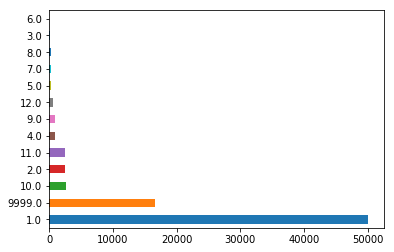

In [36]:
freewill_df.JWTR.value_counts().plot(kind='barh')

In [37]:
JWTR_df = {
9999:'N/A',
1:'Automobile',
2:'Bus',
3:'Streetcar',
4:'Subway',
5:'Railroad',
6:'Ferryboat',
7:'Taxicab',
8:'Motorcycle',
9:'Bicycle',
10:'Walked',
11:'Worked at home',
12:'Other method'}

#create column for label names
freewill_df['JWTR_labels'] = freewill_df.JWTR.map(JWTR_df)

In [38]:
freewill_df['JWTR_labels']

0            Automobile
1                   N/A
2            Automobile
3            Automobile
4                   N/A
5            Automobile
6            Automobile
7            Automobile
8            Automobile
9            Automobile
10                  N/A
11           Automobile
12           Automobile
13           Automobile
14           Automobile
15           Automobile
16                  N/A
17           Automobile
18           Automobile
19                  N/A
20           Automobile
21           Automobile
22           Automobile
23           Automobile
24                  N/A
25           Automobile
26           Automobile
27                  N/A
28           Automobile
29                  N/A
30           Automobile
31           Automobile
32           Automobile
33           Automobile
34           Automobile
35           Automobile
36           Automobile
37           Automobile
38           Automobile
39           Automobile
40           Automobile
41              

In [39]:
freewill_df.JWMNP.isna().sum()

18971

In [40]:
freewill_df.JWMNP = freewill_df.JWMNP.fillna(0)

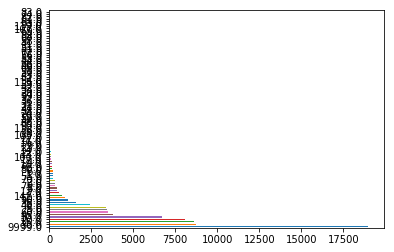

In [45]:
freewill_df.JWMNP.value_counts().plot(kind='barh')

In [46]:
freewill_df.MARHT.isna().sum()

52678

In [47]:
freewill_df.MARHT = freewill_df.MARHT.fillna(9999)

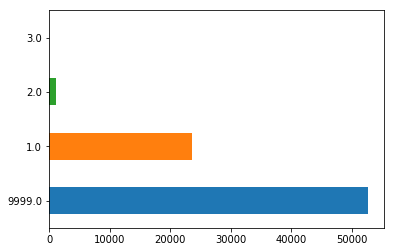

In [48]:
freewill_df.MARHT.value_counts().plot(kind='barh')

In [49]:

MARHT_df = {
9999: 'Never married',
1:'Once',
2:'Twice',
3:'Thrice or more'}

freewill_df['MARHT_labels'] = freewill_df.MARHT.map(MARHT_df)

In [50]:
freewill_df['MARHT_labels']

0                 Once
1                 Once
2                 Once
3                 Once
4        Never married
5                 Once
6                 Once
7        Never married
8                 Once
9        Never married
10       Never married
11       Never married
12       Never married
13       Never married
14       Never married
15                Once
16       Never married
17       Never married
18       Never married
19       Never married
20                Once
21                Once
22       Never married
23       Never married
24       Never married
25       Never married
26                Once
27                Once
28       Never married
29                Once
30                Once
31       Never married
32       Never married
33       Never married
34                Once
35                Once
36                Once
37       Never married
38                Once
39                Once
40       Never married
41       Never married
42       Never married
43         

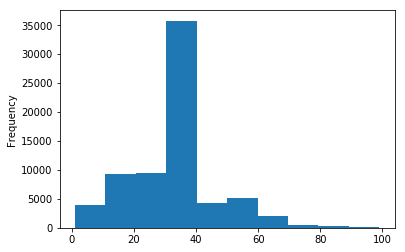

In [53]:
freewill_df.WKHP.plot(kind='hist')

In [54]:
freewill_df.WKHP.isna().sum()

6397

In [55]:
freewill_df.WKHP = freewill_df.WKHP.fillna(0)

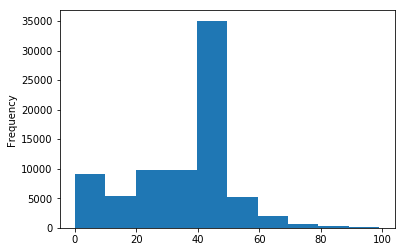

In [56]:
freewill_df.WKHP.plot(kind='hist')

In [57]:
freewill_df.WKW.isna().sum()

6397

In [58]:
freewill_df.WKW = freewill_df.WKW.fillna(0)

In [59]:
WKW_df ={
0:'N/A',
1:'50 to 52',
2:'48 to 49',
3:'40 to 47',
4:'27 to 39',
5:'14 to 26',
6:'< 14'}

freewill_df['WKW_labels'] = freewill_df.WKW.map(WKW_df)

In [60]:
freewill_df['WKW_labels']

0        50 to 52
1             N/A
2        50 to 52
3        50 to 52
4        27 to 39
5        50 to 52
6        50 to 52
7        27 to 39
8        50 to 52
9        50 to 52
10           < 14
11       27 to 39
12       40 to 47
13       50 to 52
14       50 to 52
15       50 to 52
16           < 14
17       50 to 52
18       50 to 52
19           < 14
20       50 to 52
21       50 to 52
22       27 to 39
23       50 to 52
24       14 to 26
25       50 to 52
26       50 to 52
27            N/A
28       50 to 52
29       50 to 52
30       50 to 52
31       40 to 47
32       48 to 49
33       14 to 26
34       50 to 52
35       50 to 52
36       50 to 52
37       14 to 26
38       50 to 52
39       50 to 52
40       50 to 52
41            N/A
42       27 to 39
43       50 to 52
44       50 to 52
45       50 to 52
46       50 to 52
47       27 to 39
48       50 to 52
49       50 to 52
50       50 to 52
51       50 to 52
52       27 to 39
53            N/A
54            N/A
55       5

In [61]:
   switch_WKW_df = {
    'N/A':1,
    '< 14':2,
    '14 to 26':3,
    '27 to 39':4,
    '40 to 47':5,
    '48 to 49':6,
    '50 to 52':7}

freewill_df['WKW_ord'] = freewill_df.WKW_labels.map(switch_WKW_df)

In [62]:
freewill_df[['WKW','WKW_labels', "WKW_ord"]]

WKW WKW_labels  WKW_ord
0      1.0   50 to 52        7
1      0.0        N/A        1
2      1.0   50 to 52        7
3      1.0   50 to 52        7
4      4.0   27 to 39        4
5      1.0   50 to 52        7
6      1.0   50 to 52        7
7      4.0   27 to 39        4
8      1.0   50 to 52        7
9      1.0   50 to 52        7
10     6.0       < 14        2
11     4.0   27 to 39        4
12     3.0   40 to 47        5
13     1.0   50 to 52        7
14     1.0   50 to 52        7
15     1.0   50 to 52        7
16     6.0       < 14        2
17     1.0   50 to 52        7
18     1.0   50 to 52        7
19     6.0       < 14        2
20     1.0   50 to 52        7
21     1.0   50 to 52        7
22     4.0   27 to 39        4
23     1.0   50 to 52        7
24     5.0   14 to 26        3
25     1.0   50 to 52        7
26     1.0   50 to 52        7
27     0.0        N/A        1
28     1.0   50 to 52        7
29     1.0   50 to 52        7
30     1.0   50 to 52        7
31     3.0   40 to 47        5
32     2.0   48 to 49        6
33     5.0   14 to 26        3
34     1.0   50 to 52        7
35     1.0   50 to 52        7
36     1.0   50 to 52        7
37     5.0   14 to 26        3
38     1.0   50 to 52        7
39     1.0   50 to 52        7
40     1.0   50 to 52        7
41     0.0        N/A        1
42     4.0   27 to 39        4
43     1.0   50 to 52        7
44     1.0   50 to 52        7
45     1.0   50 to 52        7
46     1.0   50 to 52        7
47     4.0   27 to 39        4
48     1.0   50 to 52        7
49     1.0   50 to 52        7
50     1.0   50 to 52        7
51     1.0   50 to 52        7
52     4.0   27 to 39        4
53     0.0        N/A        1
54     0.0        N/A        1
55     1.0   50 to 52        7
56     5.0   14 to 26        3
57     1.0   50 to 52        7
58     1.0   50 to 52        7
59     1.0   50 to 52        7
60     1.0   50 to 52        7
61     1.0   50 to 52        7
62     1.0   50 to 52        7
63     6.0       < 14        2
64     1.0   50 to 52        7
65     4.0   27 to 39        4
66     1.0   50 to 52        7
67     1.0   50 to 52        7
68     5.0   14 to 26        3
69     1.0   50 to 52        7
70     1.0   50 to 52        7
71     0.0        N/A        1
72     1.0   50 to 52        7
73     6.0       < 14        2
74     1.0   50 to 52        7
75     1.0   50 to 52        7
76     1.0   50 to 52        7
77     3.0   40 to 47        5
78     1.0   50 to 52        7
79     4.0   27 to 39        4
80     5.0   14 to 26        3
81     0.0        N/A        1
82     0.0        N/A        1
83     1.0   50 to 52        7
84     1.0   50 to 52        7
85     6.0       < 14        2
86     4.0   27 to 39        4
87     1.0   50 to 52        7
88     1.0   50 to 52        7
89     1.0   50 to 52        7
90     0.0        N/A        1
91     1.0   50 to 52        7
92     1.0   50 to 52        7
93     1.0   50 to 52        7
94     1.0   50 to 52        7
95     1.0   50 to 52        7
96     1.0   50 to 52        7
97     1.0   50 to 52        7
98     6.0       < 14        2
99     1.0   50 to 52        7
100    0.0        N/A        1
101    5.0   14 to 26        3
102    6.0       < 14        2
103    1.0   50 to 52        7
104    6.0       < 14        2
105    4.0   27 to 39        4
106    5.0   14 to 26        3
107    4.0   27 to 39        4
108    1.0   50 to 52        7
109    4.0   27 to 39        4
110    0.0        N/A        1
111    1.0   50 to 52        7
112    1.0   50 to 52        7
113    1.0   50 to 52        7
114    6.0       < 14        2
115    1.0   50 to 52        7
116    0.0        N/A        1
117    1.0   50 to 52        7
118    1.0   50 to 52        7
119    5.0   14 to 26        3
120    6.0       < 14        2
121    1.0   50 to 52        7
122    4.0   27 to 39        4
123    1.0   50 to 52        7
124    6.0       < 14        2
125    1.0   50 to 52        7
126    1.0   50 to 52        7
127    1.0   50 to 52        7
128    1

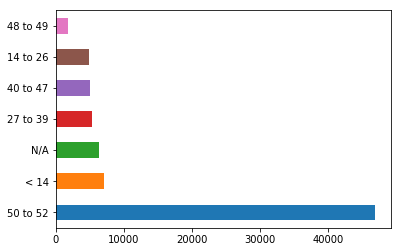

In [64]:
freewill_df.WKW_labels.value_counts().plot(kind='barh')